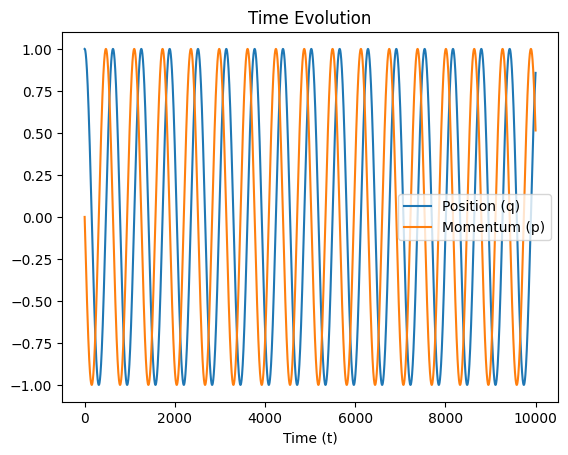

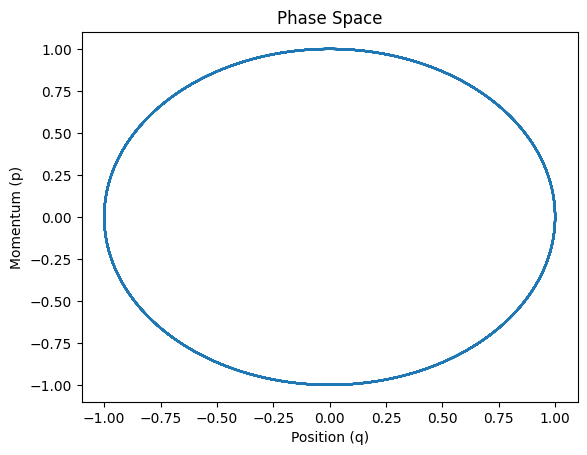

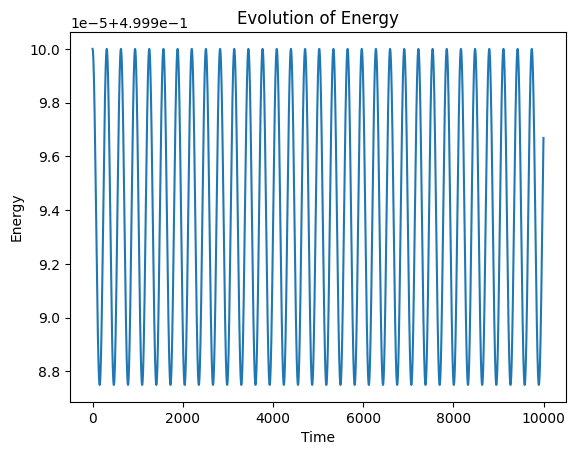

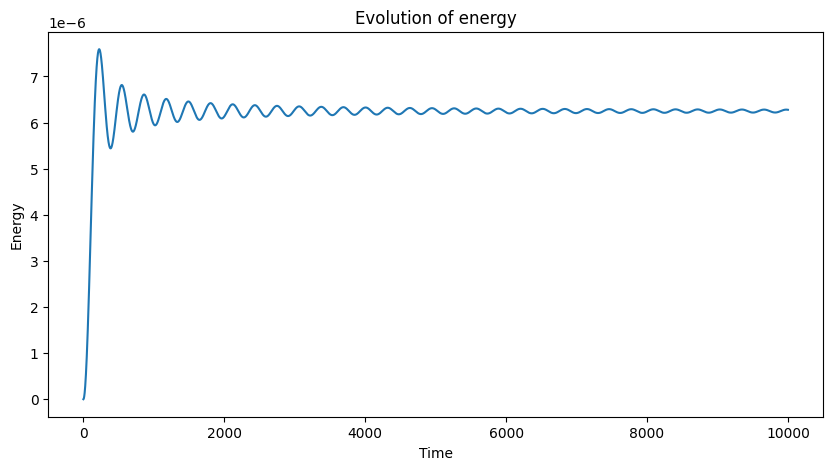

In [30]:
import sys
sys.path.append("..")
import library as lb
import numpy as np
import matplotlib.pyplot as plt
# Functions to be solved
# dq/dt = dH/dp -> q(t+1) = q(t) + dt*dH/dp
# dp/dt = -dH/dq -> p(t+1) = p(t) - dt*dH/dq

dt = 0.01 # time step
steps = 10000 # number of steps

q = np.zeros(steps)
p = np.zeros(steps)

# Initial conditions
q[0] = 1.0
p[0] = 0.0

# Definition of Hamiltonian
H = lambda q, p, k=1.0, m=1.0: 0.5*k*q**2 + 0.5*p**2/m # H = K + V

# Definition of functions
def dHdp(p, m=1.0): # m is the mass
    return p/m

def dHdq(q, k=1.0): # k is 
    return k*q

q, p = lb.stormer_verlet(q[0], p[0], 1, dHdq, dHdp, steps, dt)

# Plotting of the Phase Space
plt.plot(q, label="Position (q)")
plt.plot(p, label="Momentum (p)")
plt.xlabel("Time (t)")
plt.legend()
plt.title("Time Evolution")
plt.show()

plt.plot(q, p)
plt.xlabel("Position (q)")
plt.ylabel("Momentum (p)")
plt.title("Phase Space")
plt.show()

plt.plot(H(q, p), label="Energy")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("Evolution of Energy")
plt.show()


averages_error = np.zeros(steps)
for i in range(steps):
    averages_error[i] = np.abs(np.mean(H(q[:i], p[:i]))-0.5)

plt.figure(figsize=(10, 5))
plt.plot(averages_error, label="Energy")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("Evolution of energy")
plt.show()

Slope of the linear regression for Verlets's method:  [-2.01473138]


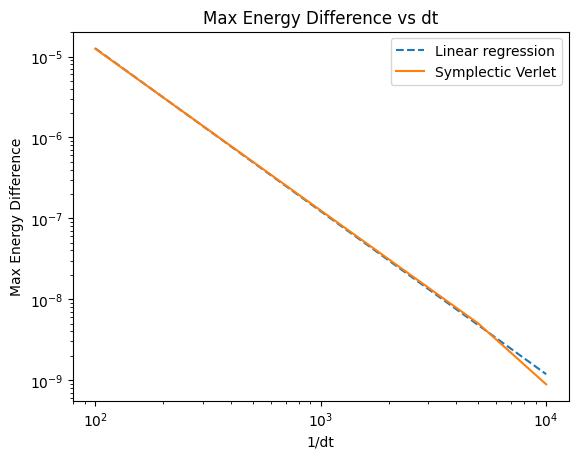

In [34]:
results_verlet = []
dts = []
for dt in np.linspace(0.01, 0.0001, 100):
    q, p = lb.stormer_verlet(q[0], p[0], 1, dHdq, dHdp, steps, dt)
    results_verlet.append(max(np.abs(H(q, p) - H(q[0], p[0]))))
    dts.append(dt)
    
# Linear regression
log_dts = np.log(1 / np.array(dts))
log_results_verlet = np.log(results_verlet)
coeffs_euler = np.polyfit(log_dts, log_results_verlet, 1)
regression_line_verlet = np.exp(coeffs_euler[1]) * (1 / np.array(dts)) ** coeffs_euler[0]

print("Slope of the linear regression for Verlets's method: ", coeffs_euler[0])

plt.plot(1/np.array(dts), regression_line_verlet, '--', label="Linear regression")
plt.loglog(1/np.array(dts), results_verlet, label="Symplectic Verlet")
plt.xlabel("1/dt")
plt.ylabel("Max Energy Difference")
plt.title("Max Energy Difference vs dt")
plt.legend()
plt.show()

Slope of the linear regression for Euler's method:  [-1.81963489]


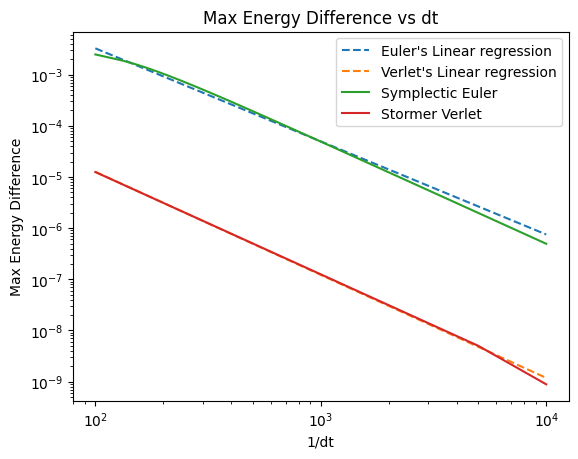

In [32]:
results_euler = []
dts = []
for dt in np.linspace(0.01, 0.0001, 100):
    q, p = lb.symplectic_euler(q[0], p[0], 1, [dHdq], [dHdp], 100, dt)
    results_euler.append(max(np.abs(H(q, p) - H(q[0], p[0]))))
    dts.append(dt)
    
# Linear regression
log_dts = np.log(1 / np.array(dts))
log_results_euler = np.log(results_euler)
coeffs_euler = np.polyfit(log_dts, log_results_euler, 1)
regression_line_euler = np.exp(coeffs_euler[1]) * (1 / np.array(dts)) ** coeffs_euler[0]

print("Slope of the linear regression for Euler's method: ", coeffs_euler[0])

plt.plot(1/np.array(dts), regression_line_euler, '--', label="Euler's Linear regression")
plt.plot(1/np.array(dts), regression_line_verlet, '--', label="Verlet's Linear regression")
plt.loglog(1/np.array(dts), results_euler, label="Symplectic Euler")
plt.loglog(1/np.array(dts), results_verlet, label="Stormer Verlet")
plt.xlabel("1/dt")
plt.ylabel("Max Energy Difference")
plt.title("Max Energy Difference vs dt")
plt.legend()
plt.show()

## Backward Error Analysis

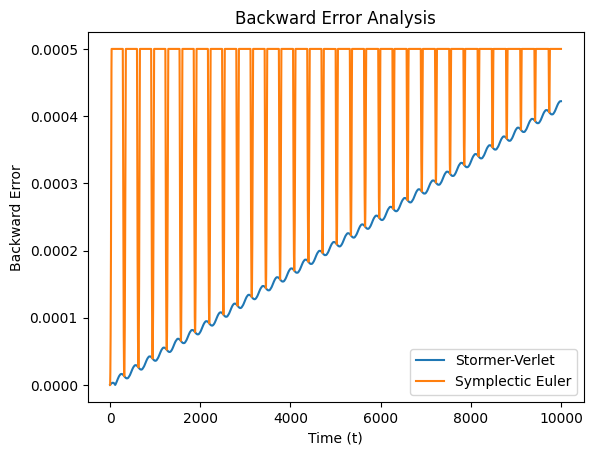

In [33]:
STEPS = 10000
dt = 0.01

def exact_solution(t):
    q = np.cos(t)
    p = -np.sin(t)
    return q, p

stormer_q_approx, stormer_p_approx = lb.stormer_verlet(q[0], p[0], 1, dHdp, dHdq, STEPS, dt)
euler_q_approx, euler_p_approx = lb.symplectic_euler(q[0], p[0], 1, [dHdp], [dHdq], STEPS, dt)

def backward_error_analysis(q_approx, p_approx, t, min_Dt=-0.0005, max_Dt=0.0005, steps=10000):
    minimun_Dt = np.ones(STEPS)*np.inf
    min_norm = np.ones(STEPS)*np.inf
    for Dt in np.linspace(min_Dt, max_Dt, steps):
        q_exact, p_exact = exact_solution(t + Dt)
        norm = np.sqrt((q_exact - q_approx)**2 + (p_exact - p_approx)**2)
        mask = norm < min_norm
        minimun_Dt[mask] = Dt
        min_norm[mask] = norm[mask]
    return np.abs(minimun_Dt)

# Compute the backward error analysis
stormer_Dt = backward_error_analysis(stormer_q_approx.flatten(), stormer_p_approx.flatten(), np.array([i*dt for i in range(STEPS)]))
euler_Dt = backward_error_analysis(euler_q_approx.flatten(), euler_p_approx.flatten(), np.array([i*dt for i in range(STEPS)]))

# Plot the backward error analysis
plt.plot(stormer_Dt, label="Stormer-Verlet")
plt.plot(euler_Dt, label="Symplectic Euler")
plt.xlabel("Time (t)")
plt.ylabel("Backward Error")
plt.title("Backward Error Analysis")
plt.legend()
plt.show()


